# $11^{th}$ excercise

In [40]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [41]:
# target parameters of f(x) = m*x + b
m = 2 
b = 1 

In [46]:
sigmas = np.array([0.,0.1,1])
Ntrains = np.linspace(100,1000,3,dtype=int)
Nepochss = np.linspace(10,50,3,dtype=int)
print(sigmas)
print(Ntrains)
print(Nepochss)

[0.  0.1 1. ]
[ 100  550 1000]
[10 30 50]


Voglio plottare: m_model - m, b_model -b -> 2, 27 pti ognuna
Loss functions: -> 27 grafici -> faccio script che stampa 3 grafici in cui una quantità varia e le altre sono fisse

One should consider the following blocks as interactive. Our script produced 27 datasets of Train/Validation loss in function of epochs. Referring to the following table:

In [61]:
import pandas as pd
pd.DataFrame({'sigma': sigmas, 'N_train':Ntrains, 'N_epochs': Nepochss})

,sigma,N_train,N_epochs
0,0.0,100,10
1,0.1,550,30
2,1.0,1000,50


One is able to choose one of those three quantities using their column name and then fix a value for the other two quantities using their row index. The block will produce 3 output graphs of the loss functions where the chosen quantity is different in each graph, while the ohter two are fixed to the selected values.

In [49]:
for sigma in sigmas:
    for Ntrain in Ntrains:
        Nvalid = Ntrain // 10
        for Nepochs in Nepochss:
            #Reset rangen
            np.random.seed(0)
            tf.random.set_seed(0)
            #creating training and validation datasets
            x_train = np.random.uniform(-1, 1, Ntrain)
            x_valid.sort()
            y_train = np.random.normal(m * x_train + b, sigma)
            
            x_valid = np.random.uniform(-1, 1, Nvalid)
            y_valid = np.random.normal(m * x_valid + b, sigma) 
            
            y_target = m * x_valid + b
            #creating and compiling the model
            model = tf.keras.Sequential()
            model.add(Dense(1, input_shape=(1,)))
            model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
            #optimizing the model
            history = model.fit(x=x_train, y=y_train, batch_size=32, 
                                epochs=Nepochs,shuffle=True, 
                                validation_data=(x_valid, y_valid))

Epoch 1/10
4/4 [==============================] - 1s 92ms/step - loss: 3.1255 - mse: 3.1255 - val_loss: 1.4532 - val_mse: 1.4532
Epoch 2/10
4/4 [==============================] - 0s 28ms/step - loss: 2.8571 - mse: 2.8571 - val_loss: 1.3592 - val_mse: 1.3592
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 2.6667 - mse: 2.6667 - val_loss: 1.2610 - val_mse: 1.2610
Epoch 4/10
4/4 [==============================] - 0s 31ms/step - loss: 2.4662 - mse: 2.4662 - val_loss: 1.1927 - val_mse: 1.1927
Epoch 5/10
4/4 [==============================] - 0s 32ms/step - loss: 2.3248 - mse: 2.3248 - val_loss: 1.1362 - val_mse: 1.1362
Epoch 6/10
4/4 [==============================] - 0s 26ms/step - loss: 2.2055 - mse: 2.2055 - val_loss: 1.0764 - val_mse: 1.0764
Epoch 7/10
4/4 [==============================] - 0s 24ms/step - loss: 2.0822 - mse: 2.0822 - val_loss: 0.9969 - val_mse: 0.9969
Epoch 8/10
4/4 [==============================] - 0s 23ms/step - loss: 1.9113 - mse: 1.9113 - val

4/4 [==============================] - 0s 24ms/step - loss: 0.7681 - mse: 0.7681 - val_loss: 0.4135 - val_mse: 0.4135
Epoch 25/50
4/4 [==============================] - 0s 23ms/step - loss: 0.7242 - mse: 0.7242 - val_loss: 0.3943 - val_mse: 0.3943
Epoch 26/50
4/4 [==============================] - 0s 23ms/step - loss: 0.6862 - mse: 0.6862 - val_loss: 0.3719 - val_mse: 0.3719
Epoch 27/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6410 - mse: 0.6410 - val_loss: 0.3522 - val_mse: 0.3522
Epoch 28/50
4/4 [==============================] - 0s 22ms/step - loss: 0.6057 - mse: 0.6057 - val_loss: 0.3374 - val_mse: 0.3374
Epoch 29/50
4/4 [==============================] - 0s 22ms/step - loss: 0.5753 - mse: 0.5753 - val_loss: 0.3187 - val_mse: 0.3187
Epoch 30/50
4/4 [==============================] - 0s 23ms/step - loss: 0.5388 - mse: 0.5388 - val_loss: 0.2996 - val_mse: 0.2996
Epoch 31/50
4/4 [==============================] - 0s 23ms/step - loss: 0.5068 - mse: 0.5068 - val_los

Epoch 27/30
18/18 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 28/30
18/18 [==============================] - 0s 6ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 29/30
18/18 [==============================] - 0s 6ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 30/30
18/18 [==============================] - 0s 8ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1/50
18/18 [==============================] - 1s 19ms/step - loss: 2.9446 - mse: 2.9446 - val_loss: 3.3276 - val_mse: 3.3276
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 2.1058 - mse: 2.1058 - val_loss: 2.4187 - val_mse: 2.4187
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 1.5390 - mse: 1.5390 - val_loss: 1.8150 - val_mse: 1.8150
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 1.1626 - mse:

32/32 [==============================] - 0s 5ms/step - loss: 0.1558 - mse: 0.1558 - val_loss: 0.1110 - val_mse: 0.1110
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1003 - mse: 0.1003 - val_loss: 0.0721 - val_mse: 0.0721
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0652 - mse: 0.0652 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0423 - mse: 0.0423 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 1/30
32/32 [==============================] - 1s 11ms/step - loss: 2.6126 - mse: 2.6126 - val_loss: 1.7315 - val_mse: 1.7315
Epoch 2/30
32/32 [==============================] - 0s 6ms/step - loss: 1.4898 - mse: 1.4898 - val_loss: 1.0335 - val_mse: 1.0335
Epoch 3/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9154 - mse: 0.9154 - val_loss: 0.6481 - val_mse: 0.6481
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 0.5806 - mse: 0.5806 - val_

32/32 [==============================] - 0s 6ms/step - loss: 2.6356e-05 - mse: 2.6356e-05 - val_loss: 1.8990e-05 - val_mse: 1.8990e-05
Epoch 28/50
32/32 [==============================] - 0s 5ms/step - loss: 1.7174e-05 - mse: 1.7174e-05 - val_loss: 1.2326e-05 - val_mse: 1.2326e-05
Epoch 29/50
32/32 [==============================] - 0s 5ms/step - loss: 1.1143e-05 - mse: 1.1143e-05 - val_loss: 7.9590e-06 - val_mse: 7.9590e-06
Epoch 30/50
32/32 [==============================] - 0s 6ms/step - loss: 7.1953e-06 - mse: 7.1953e-06 - val_loss: 5.1532e-06 - val_mse: 5.1532e-06
Epoch 31/50
32/32 [==============================] - 0s 6ms/step - loss: 4.6592e-06 - mse: 4.6592e-06 - val_loss: 3.3311e-06 - val_mse: 3.3311e-06
Epoch 32/50
32/32 [==============================] - 0s 6ms/step - loss: 3.0118e-06 - mse: 3.0118e-06 - val_loss: 2.1637e-06 - val_mse: 2.1637e-06
Epoch 33/50
32/32 [==============================] - 0s 4ms/step - loss: 1.9563e-06 - mse: 1.9563e-06 - val_loss: 1.4073e-06 - val

4/4 [==============================] - 0s 26ms/step - loss: 0.6523 - mse: 0.6523 - val_loss: 0.3739 - val_mse: 0.3739
Epoch 28/30
4/4 [==============================] - 0s 25ms/step - loss: 0.6164 - mse: 0.6164 - val_loss: 0.3590 - val_mse: 0.3590
Epoch 29/30
4/4 [==============================] - 0s 25ms/step - loss: 0.5856 - mse: 0.5856 - val_loss: 0.3402 - val_mse: 0.3402
Epoch 30/30
4/4 [==============================] - 0s 22ms/step - loss: 0.5498 - mse: 0.5498 - val_loss: 0.3203 - val_mse: 0.3203
Epoch 1/50
4/4 [==============================] - 1s 88ms/step - loss: 3.1615 - mse: 3.1615 - val_loss: 1.4828 - val_mse: 1.4828
Epoch 2/50
4/4 [==============================] - 0s 21ms/step - loss: 2.8883 - mse: 2.8883 - val_loss: 1.3879 - val_mse: 1.3879
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 2.6959 - mse: 2.6959 - val_loss: 1.2888 - val_mse: 1.2888
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 2.4928 - mse: 2.4928 - val_loss: 1

18/18 [==============================] - 0s 6ms/step - loss: 0.2655 - mse: 0.2655 - val_loss: 0.2905 - val_mse: 0.2905
Epoch 1/30
18/18 [==============================] - 1s 17ms/step - loss: 2.9641 - mse: 2.9641 - val_loss: 3.2918 - val_mse: 3.2918
Epoch 2/30
18/18 [==============================] - 0s 7ms/step - loss: 2.1250 - mse: 2.1250 - val_loss: 2.3878 - val_mse: 2.3878
Epoch 3/30
18/18 [==============================] - 0s 8ms/step - loss: 1.5585 - mse: 1.5585 - val_loss: 1.7879 - val_mse: 1.7879
Epoch 4/30
18/18 [==============================] - 0s 6ms/step - loss: 1.1812 - mse: 1.1812 - val_loss: 1.3605 - val_mse: 1.3605
Epoch 5/30
18/18 [==============================] - 0s 6ms/step - loss: 0.9084 - mse: 0.9084 - val_loss: 1.0462 - val_mse: 1.0462
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 0.7067 - mse: 0.7067 - val_loss: 0.8004 - val_mse: 0.8004
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: 0.5483 - mse: 0.5483 - val_l

Epoch 33/50
18/18 [==============================] - 0s 8ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 34/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 35/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 36/50
18/18 [==============================] - 0s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 37/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 38/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 39/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 40/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0101 - m

Epoch 6/50
32/32 [==============================] - 0s 5ms/step - loss: 0.2490 - mse: 0.2490 - val_loss: 0.1810 - val_mse: 0.1810
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.1646 - mse: 0.1646 - val_loss: 0.1197 - val_mse: 0.1197
Epoch 8/50
32/32 [==============================] - 0s 7ms/step - loss: 0.1094 - mse: 0.1094 - val_loss: 0.0808 - val_mse: 0.0808
Epoch 9/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0744 - mse: 0.0744 - val_loss: 0.0553 - val_mse: 0.0553
Epoch 10/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0514 - mse: 0.0514 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 11/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 12/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0270 - mse: 0.0270 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 13/50
32/32 [==============================] - 0s 5ms/step - loss: 0.0208 - mse: 

Epoch 9/30
4/4 [==============================] - 0s 23ms/step - loss: 2.8648 - mse: 2.8648 - val_loss: 1.8255 - val_mse: 1.8255
Epoch 10/30
4/4 [==============================] - 0s 23ms/step - loss: 2.7524 - mse: 2.7524 - val_loss: 1.7744 - val_mse: 1.7744
Epoch 11/30
4/4 [==============================] - 0s 22ms/step - loss: 2.6365 - mse: 2.6365 - val_loss: 1.7370 - val_mse: 1.7370
Epoch 12/30
4/4 [==============================] - 0s 27ms/step - loss: 2.5453 - mse: 2.5453 - val_loss: 1.6851 - val_mse: 1.6851
Epoch 13/30
4/4 [==============================] - 0s 23ms/step - loss: 2.4132 - mse: 2.4132 - val_loss: 1.6439 - val_mse: 1.6439
Epoch 14/30
4/4 [==============================] - 0s 24ms/step - loss: 2.3379 - mse: 2.3379 - val_loss: 1.5990 - val_mse: 1.5990
Epoch 15/30
4/4 [==============================] - 0s 25ms/step - loss: 2.2772 - mse: 2.2772 - val_loss: 1.5591 - val_mse: 1.5591
Epoch 16/30
4/4 [==============================] - 0s 24ms/step - loss: 2.1992 - mse: 2.199

4/4 [==============================] - 0s 34ms/step - loss: 1.2788 - mse: 1.2788 - val_loss: 1.0637 - val_mse: 1.0637
Epoch 43/50
4/4 [==============================] - 0s 27ms/step - loss: 1.2646 - mse: 1.2646 - val_loss: 1.0625 - val_mse: 1.0625
Epoch 44/50
4/4 [==============================] - 0s 26ms/step - loss: 1.2531 - mse: 1.2531 - val_loss: 1.0443 - val_mse: 1.0443
Epoch 45/50
4/4 [==============================] - 0s 28ms/step - loss: 1.2369 - mse: 1.2369 - val_loss: 1.0378 - val_mse: 1.0378
Epoch 46/50
4/4 [==============================] - 0s 30ms/step - loss: 1.2225 - mse: 1.2225 - val_loss: 1.0322 - val_mse: 1.0322
Epoch 47/50
4/4 [==============================] - 0s 27ms/step - loss: 1.2146 - mse: 1.2146 - val_loss: 1.0253 - val_mse: 1.0253
Epoch 48/50
4/4 [==============================] - 0s 16ms/step - loss: 1.2036 - mse: 1.2036 - val_loss: 1.0141 - val_mse: 1.0141
Epoch 49/50
4/4 [==============================] - 0s 17ms/step - loss: 1.1944 - mse: 1.1944 - val_los

Epoch 15/50
18/18 [==============================] - 0s 8ms/step - loss: 1.0738 - mse: 1.0738 - val_loss: 1.3293 - val_mse: 1.3293
Epoch 16/50
18/18 [==============================] - 0s 7ms/step - loss: 1.0547 - mse: 1.0547 - val_loss: 1.3234 - val_mse: 1.3234
Epoch 17/50
18/18 [==============================] - 0s 6ms/step - loss: 1.0418 - mse: 1.0418 - val_loss: 1.3149 - val_mse: 1.3149
Epoch 18/50
18/18 [==============================] - 0s 6ms/step - loss: 1.0295 - mse: 1.0295 - val_loss: 1.3160 - val_mse: 1.3160
Epoch 19/50
18/18 [==============================] - 0s 6ms/step - loss: 1.0195 - mse: 1.0195 - val_loss: 1.3198 - val_mse: 1.3198
Epoch 20/50
18/18 [==============================] - 0s 6ms/step - loss: 1.0142 - mse: 1.0142 - val_loss: 1.3197 - val_mse: 1.3197
Epoch 21/50
18/18 [==============================] - 0s 9ms/step - loss: 1.0076 - mse: 1.0076 - val_loss: 1.3240 - val_mse: 1.3240
Epoch 22/50
18/18 [==============================] - 0s 7ms/step - loss: 1.0032 - m

32/32 [==============================] - 0s 6ms/step - loss: 0.9355 - mse: 0.9355 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 18/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9347 - mse: 0.9347 - val_loss: 0.8288 - val_mse: 0.8288
Epoch 19/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9350 - mse: 0.9350 - val_loss: 0.8281 - val_mse: 0.8281
Epoch 20/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9343 - mse: 0.9343 - val_loss: 0.8277 - val_mse: 0.8277
Epoch 21/30
32/32 [==============================] - 0s 6ms/step - loss: 0.9342 - mse: 0.9342 - val_loss: 0.8269 - val_mse: 0.8269
Epoch 22/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9337 - mse: 0.9337 - val_loss: 0.8266 - val_mse: 0.8266
Epoch 23/30
32/32 [==============================] - 0s 5ms/step - loss: 0.9336 - mse: 0.9336 - val_loss: 0.8265 - val_mse: 0.8265
Epoch 24/30
32/32 [==============================] - 0s 6ms/step - loss: 0.9334 - mse: 0.9334 -

Epoch 50/50
32/32 [==============================] - 0s 5ms/step - loss: 0.9334 - mse: 0.9334 - val_loss: 0.8263 - val_mse: 0.8263


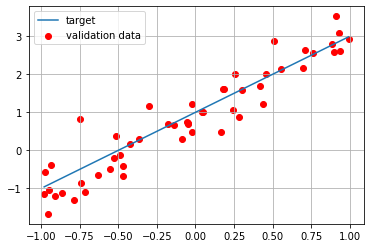

In [27]:
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [17]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 1s 12ms/step - loss: 4.1913 - mse: 4.1913 - val_loss: 3.6822 - val_mse: 3.6822
Epoch 2/50
32/32 [==============================] - 0s 5ms/step - loss: 2.5888 - mse: 2.5888 - val_loss: 2.4248 - val_mse: 2.4248
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 1.7104 - mse: 1.7104 - val_loss: 1.6584 - val_mse: 1.6584
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 1.1792 - mse: 1.1792 - val_loss: 1.1715 - val_mse: 1.1715
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 0.8473 - mse: 0.8473 - val_loss: 0.8475 - val_mse: 0.8475
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.6300 - mse: 0.6300 - val_loss: 0.6389 - val_mse: 0.6389
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.4929 - mse: 0.4929 - val_loss: 0.5004 - val_mse: 0.5004
Epoch 8/50
32/32 [==============================] - 0s 5ms/step - loss: 0.4038 - mse: 0.4

In [18]:
model.get_weights()

[array([[2.0099585]], dtype=float32), array([1.0108371], dtype=float32)]

In [19]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.2047 - mse: 0.2047

Test loss: 0.20470203459262848
Test accuracy: 0.20470203459262848


In [20]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.2047 - mse: 0.2047

Test loss: 0.20470203459262848
Test accuracy: 0.20470203459262848


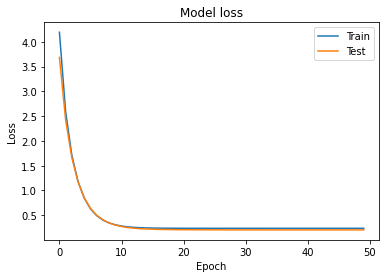

In [21]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 4ms/step


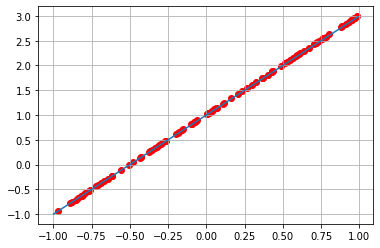

In [22]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()